The purpose of this project: see ReadMe file. 

Before examining the data, I assume there are four types of working clusters based on utility function:  
The first type, charge lower fees to client but those CPAs present less client numbers (i.e., small client portfolio, less experienced/popular); 
The second type, charge lower fees but CPAs have larger client pool (i.e., popular by gentiles);
The third type, interaction of type I and type II; 
And the fourth type, charge high fees but have very small client pool (i.e., luxury audit services). 

Regular might have interest and want to investigate type II and type IV. For type II represents 'busy' auditors where work coordination and quality assurance would be the concerns. For the type IV represents the very likely 'abnormal' services to clients and regulator might have interest to probe the reason behind that. 

In [26]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

from sklearn.cluster import KMeans

In [27]:
df=pd.read_csv('CICPA.csv',index_col=0)

In [28]:
df.head(10)

,year,stkcd,total_fee
id,,,
1,2010,683,500000.0
1,2010,692,550000.0
1,2010,2281,250000.0
1,2010,2320,300000.0
1,2010,600189,600000.0
1,2010,600498,480000.0
1,2010,300005,250000.0
1,2010,600185,400000.0
2,2010,600805,650000.0


In [29]:
customer_number=df.groupby('id').stkcd.agg(['count'])

In [30]:
customer_number.columns=['count_customer_number']

In [31]:
customer_number.head()

,count_customer_number
id,
1,8
2,1
3,2
4,1
5,7


In [32]:
auditfee_charge=df.groupby('id').total_fee.agg(['mean','sum'])
auditfee_charge.columns=['Average_charge','Total_charge']

In [33]:
auditfee_charge.head()

,Average_charge,Total_charge
id,,
1,4.162500e+05,3330000.0
2,6.500000e+05,650000.0
3,4.650000e+05,930000.0
4,1.448000e+07,14480000.0
5,8.942857e+05,6260000.0


In [34]:
main=customer_number.join(auditfee_charge)
main.head()

,count_customer_number,Average_charge,Total_charge
id,,,
1,8,4.162500e+05,3330000.0
2,1,6.500000e+05,650000.0
3,2,4.650000e+05,930000.0
4,1,1.448000e+07,14480000.0
5,7,8.942857e+05,6260000.0


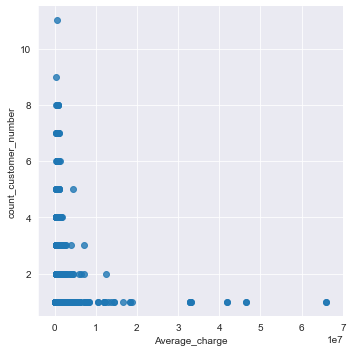

In [35]:
sns.lmplot(x='Average_charge',y='count_customer_number',data=main,fit_reg=False)

In [38]:
kmeans=KMeans(n_clusters=4, random_state=122)
kmeans.fit(main)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=122, tol=0.0001, verbose=0)

In [40]:
clustered_data=main.copy()
clustered_data['cluster']=kmeans.predict(main)
clustered_data.head()

,count_customer_number,Average_charge,Total_charge,cluster
id,,,,
1,8,4.162500e+05,3330000.0,0
2,1,6.500000e+05,650000.0,0
3,2,4.650000e+05,930000.0,0
4,1,1.448000e+07,14480000.0,2
5,7,8.942857e+05,6260000.0,0


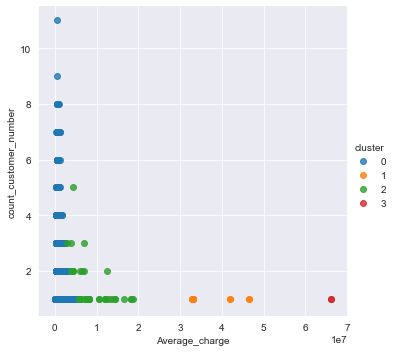

In [41]:
sns.lmplot(x='Average_charge',y='count_customer_number',hue='cluster',data=clustered_data,fit_reg=False)

In [53]:
def fit_and_plot_kmeans(model, X):
    kmeans=model
    kmeans.fit(X)
    
    clustered_data=X.copy()
    clustered_data['cluster']=kmeans.predict(X)
    
    sns.lmplot(x='Average_charge', y='count_customer_number', hue='cluster', data=clustered_data, fit_reg=False)
    
    plt.show()
    

max_inters 1


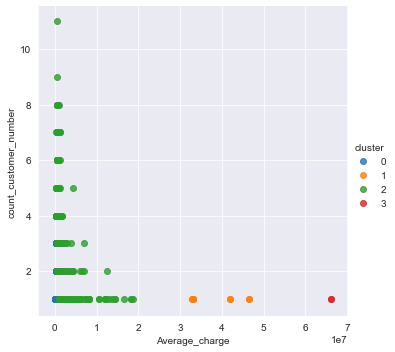

max_inters 5


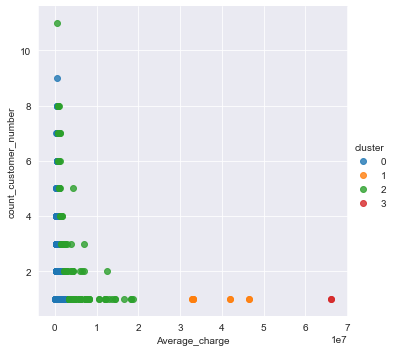

max_inters 7


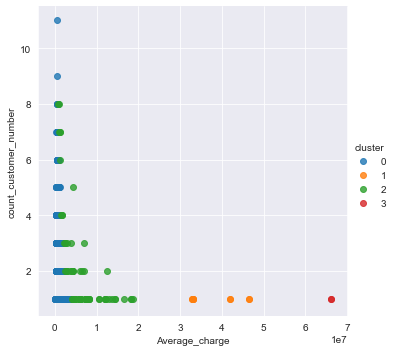

max_inters 9


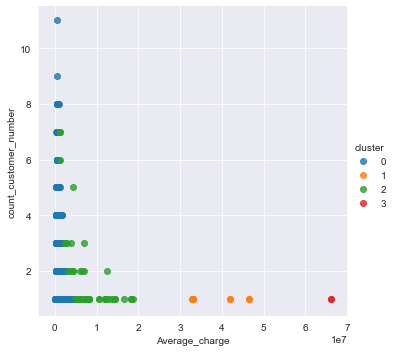

max_inters 10


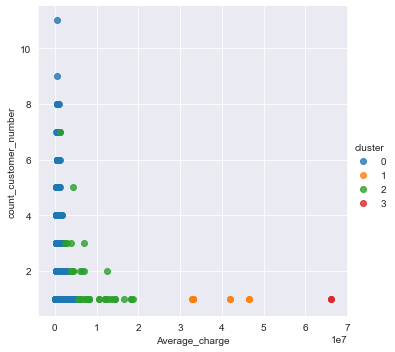

max_inters 15


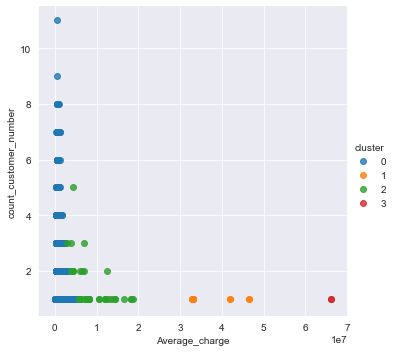

max_inters 20


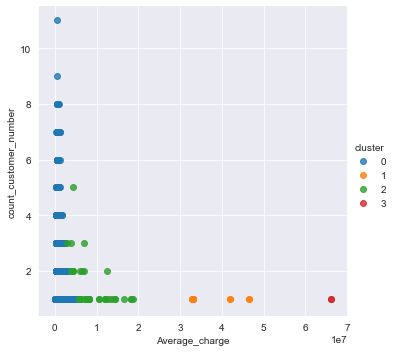

In [54]:
for max_iters in [1,5,7,9,10,15,20]:
    print('max_inters', max_iters)
    
    kmeans=KMeans(n_clusters=4,
                 random_state=122,
                 max_iter=max_iters,
                 n_init=1,
                 init='random')
    
    fit_and_plot_kmeans(kmeans, clustered_data)
    
#conclude: iters 15 might be the best 

clusters 1


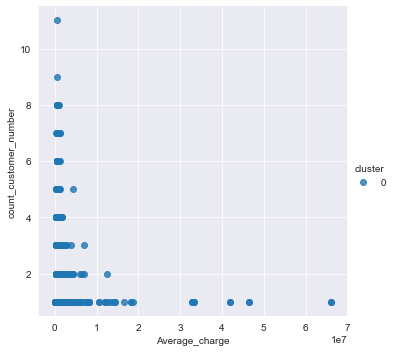

clusters 2


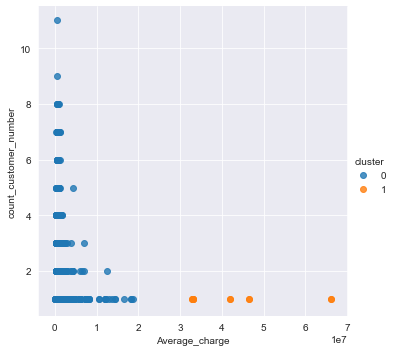

clusters 3


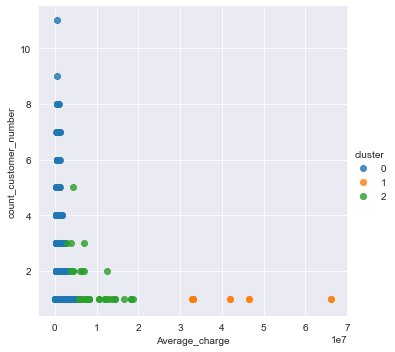

clusters 4


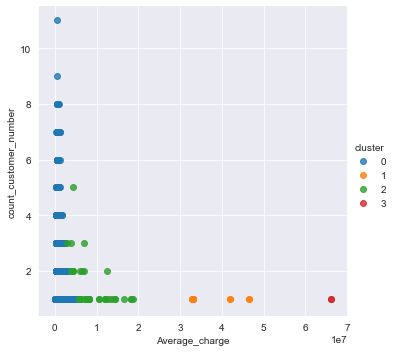

clusters 5


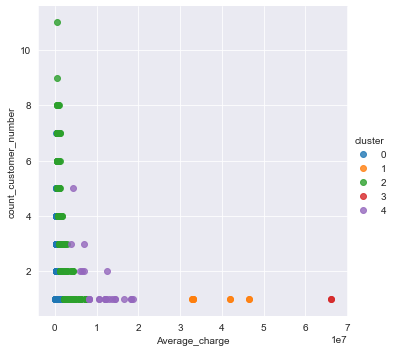

clusters 6


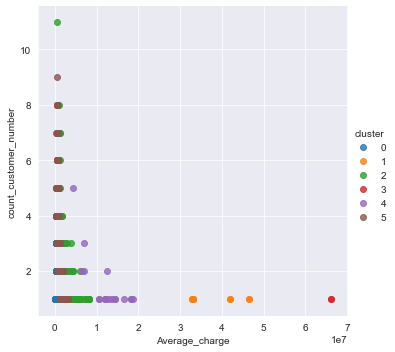

In [55]:
for clusters in [2,3,4,5,6]:
    print('clusters', clusters)
    
    kmeans=KMeans(n_clusters=clusters,
                 random_state=122,
                 max_iter=15,
                 n_init=1,
                 init='random')
    
    fit_and_plot_kmeans(kmeans, clustered_data)
    
#clusters number 5 might be the best 